In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Daily_Public_Transport_Passenger_Journeys.csv to Daily_Public_Transport_Passenger_Journeys.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
from prophet import Prophet
import warnings
warnings.filterwarnings('ignore')

In [ ]:

df = pd.read_csv("Daily_Public_Transport_Passenger_Journeys.csv")
df.head()


,Date,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
0,30/08/2024,16436,10705,225,19026,3925,59.0
1,15/09/2023,15499,10671,267,18421,4519,61.0
2,28/12/2021,1756,2352,0,3775,0,13.0
3,11/01/2023,10536,8347,223,14072,0,48.0
4,11/09/2021,820,612,0,1283,0,11.0


In [ ]:
print("Columns:", df.columns.tolist())
print(df.head())

Columns: ['Date', 'Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School', 'Other']
         Date  Local Route  Light Rail  Peak Service  Rapid Route  School  \
0  30/08/2024        16436       10705           225        19026    3925   
1  15/09/2023        15499       10671           267        18421    4519   
2  28/12/2021         1756        2352             0         3775       0   
3  11/01/2023        10536        8347           223        14072       0   
4  11/09/2021          820         612             0         1283       0   

   Other  
0   59.0  
1   61.0  
2   13.0  
3   48.0  
4   11.0  


In [ ]:
# EDA to find missing values
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

# Sort data by date to ensure correct time order
df = df.sort_values(by='Date').reset_index(drop=True)

# Basic info
print("Data loaded and sorted successfully.")
print("Time range:", df['Date'].min(), "to", df['Date'].max())
print("\nMissing values per column:\n", df.isnull().sum())

# Summary statistics
print("\nSummary statistics:\n", df.describe())


Data loaded and sorted successfully.
Time range: 2019-07-01 00:00:00 to 2024-09-29 00:00:00

Missing values per column:
 Date             0
Local Route      0
Light Rail       0
Peak Service     0
Rapid Route      0
School           0
Other           20
dtype: int64

Summary statistics:
                       Date   Local Route    Light Rail  Peak Service  \
count                 1918   1918.000000   1918.000000   1918.000000   
mean   2022-02-13 12:00:00   9891.395203   7195.446298    179.581335   
min    2019-07-01 00:00:00      1.000000      0.000000      0.000000   
25%    2020-10-22 06:00:00   3044.500000   4463.500000      0.000000   
50%    2022-02-13 12:00:00  11417.000000   7507.000000    193.000000   
75%    2023-06-07 18:00:00  15517.500000  10008.250000    313.750000   
max    2024-09-29 00:00:00  21070.000000  15154.000000   1029.000000   
std                    NaN   6120.715714   3345.616428    156.532738   

        Rapid Route       School        Other  
count   1918.0

In [ ]:
# Filling missing 'Other' values with 0
df['Other'] = df['Other'].fillna(0)


In [ ]:
# Basic info
print("\nDataset info:")
print(df.info())

# Summary stats
print("\nSummary statistics:")
print(df.describe())


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1918 entries, 0 to 1917
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1918 non-null   datetime64[ns]
 1   Local Route   1918 non-null   int64         
 2   Light Rail    1918 non-null   int64         
 3   Peak Service  1918 non-null   int64         
 4   Rapid Route   1918 non-null   int64         
 5   School        1918 non-null   int64         
 6   Other         1918 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(5)
memory usage: 105.0 KB
None

Summary statistics:
                      Date   Local Route    Light Rail  Peak Service  \
count                 1918   1918.000000   1918.000000   1918.000000   
mean   2022-02-13 12:00:00   9891.395203   7195.446298    179.581335   
min    2019-07-01 00:00:00      1.000000      0.000000      0.000000   
25%    2020-10-22 06:00:00   3044.500000   4

In [ ]:
# Sort by date to ensure chronological order
df = df.sort_values(by='Date').reset_index(drop=True)

# Verify order
print("Data sorted. Date range:", df['Date'].min(), "to", df['Date'].max())


Data sorted. Date range: 2019-07-01 00:00:00 to 2024-09-29 00:00:00


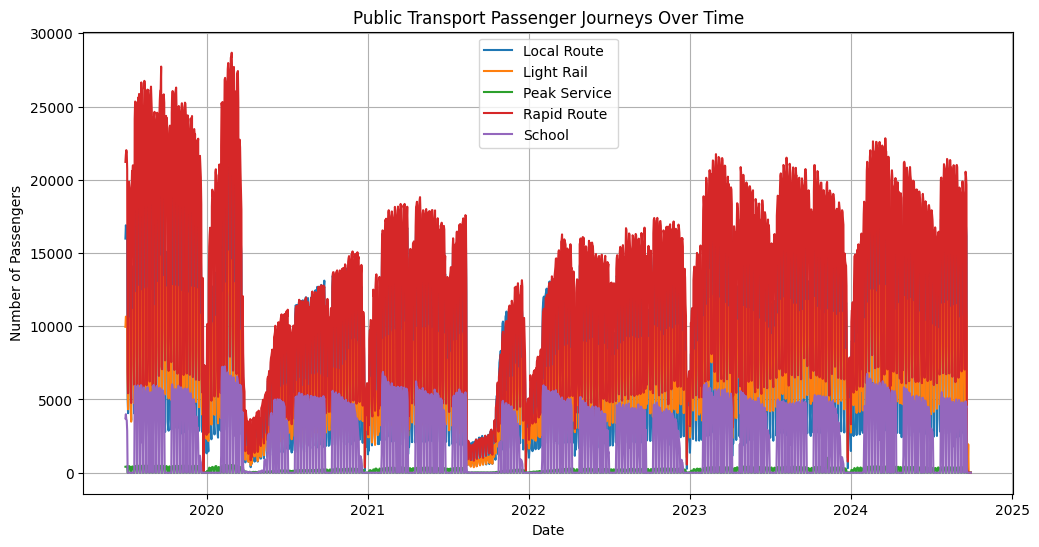

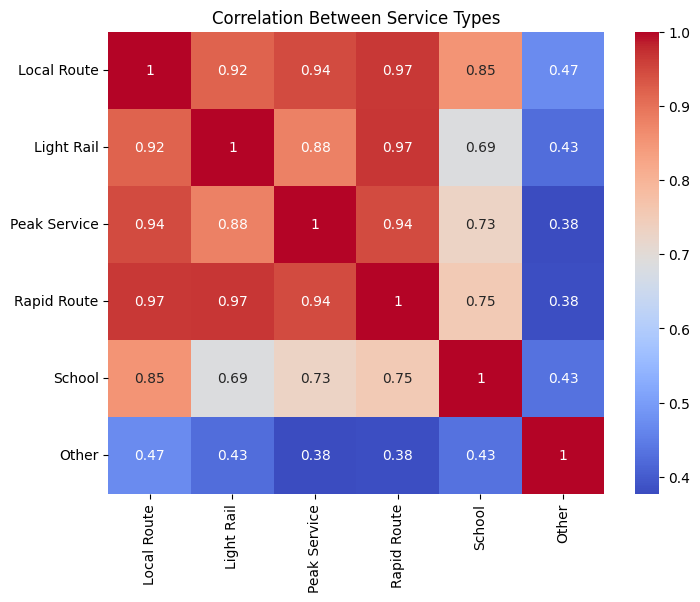

In [ ]:
# Plot passenger trends over time
plt.figure(figsize=(12,6))
for col in ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School']:
    plt.plot(df['Date'], df[col], label=col)
plt.title('Public Transport Passenger Journeys Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(True)
plt.show()

# Check correlations
plt.figure(figsize=(8,6))
sns.heatmap(df[['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School', 'Other']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Service Types')
plt.show()

In [ ]:
# SARIMA model for local route

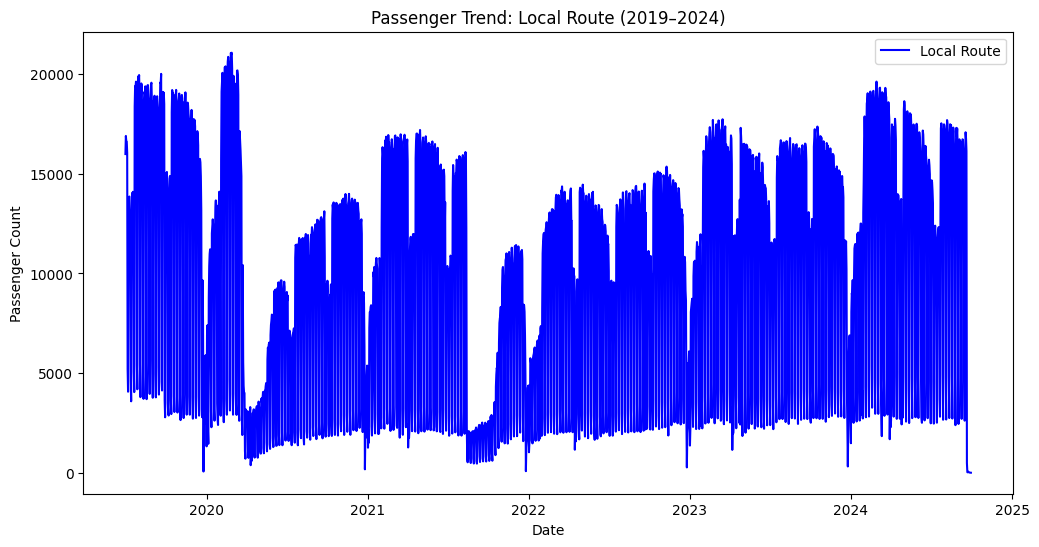

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Local Route'], label='Local Route', color='blue')
plt.title('Passenger Trend: Local Route (2019–2024)')
plt.xlabel('Date')
plt.ylabel('Passenger Count')
plt.legend()
plt.show()


In [ ]:
from statsmodels.tsa.stattools import adfuller

# Perform the test to check stationarity
result = adfuller(df['Local Route'].dropna())

print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:", result[4])

if result[1] < 0.05:
    print("Series is stationary ")
else:
    print("Series is NOT stationary ")


ADF Statistic: -4.580035661257346
p-value: 0.00014056803698915072
Critical Values: {'1%': np.float64(-3.4338036790464495), '5%': np.float64(-2.8630656035129878), '10%': np.float64(-2.5675821738080615)}
Series is stationary 


MAE: 6480.10, RMSE: 8864.27


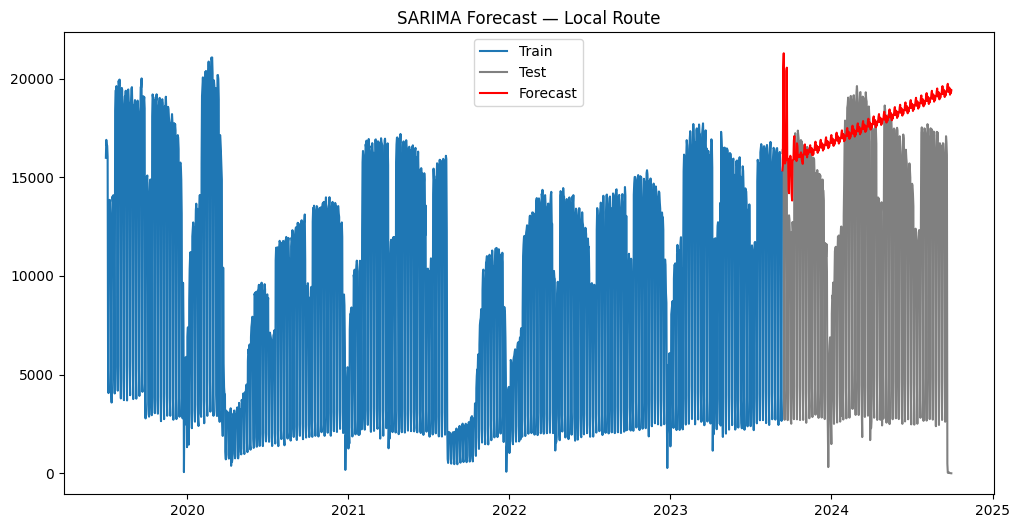

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Split data
train_size = int(len(df) * 0.8)
train, test = df['Local Route'][:train_size], df['Local Route'][train_size:]

# Build SARIMA model
model = SARIMAX(train,
                order=(1,1,1),           # ARIMA parameters (p,d,q)
                seasonal_order=(1,1,1,12))  # Seasonal params (P,D,Q,s)
results = model.fit()

# Forecast
forecast = results.forecast(steps=len(test))

# Evaluate
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}")

# Plot
plt.figure(figsize=(12,6))
plt.plot(train, label='Train')
plt.plot(test, label='Test', color='gray')
plt.plot(forecast, label='Forecast', color='red')
plt.legend()
plt.title("SARIMA Forecast — Local Route")
plt.show()


Future 30-Day SARIMA Forecast:
   Forecast_Date  Predicted_Passengers  Lower_CI  Upper_CI
0     2023-09-12              15347.61   5331.64  25363.59
1     2023-09-13              15591.62   1426.92  29756.31
2     2023-09-14              20528.34   3180.34  37876.33
3     2023-09-15              21282.41   1250.78  41314.04
4     2023-09-16              15741.43  -6654.56  38137.41
5     2023-09-17              15706.42  -8827.09  40239.94
6     2023-09-18              15700.80 -10798.40  42199.99
7     2023-09-19              15791.18 -12537.62  44119.97
8     2023-09-20              15906.93 -14140.28  45954.13
9     2023-09-21              20389.62 -11282.88  52062.13
10    2023-09-22              20553.15 -12665.25  53771.54
11    2023-09-23              15887.59 -18807.86  50583.05
12    2023-09-24              15946.47 -19305.77  51198.71
13    2023-09-25              15872.28 -19928.08  51672.63
14    2023-09-26              14308.79 -22031.30  50648.88
15    2023-09-27         

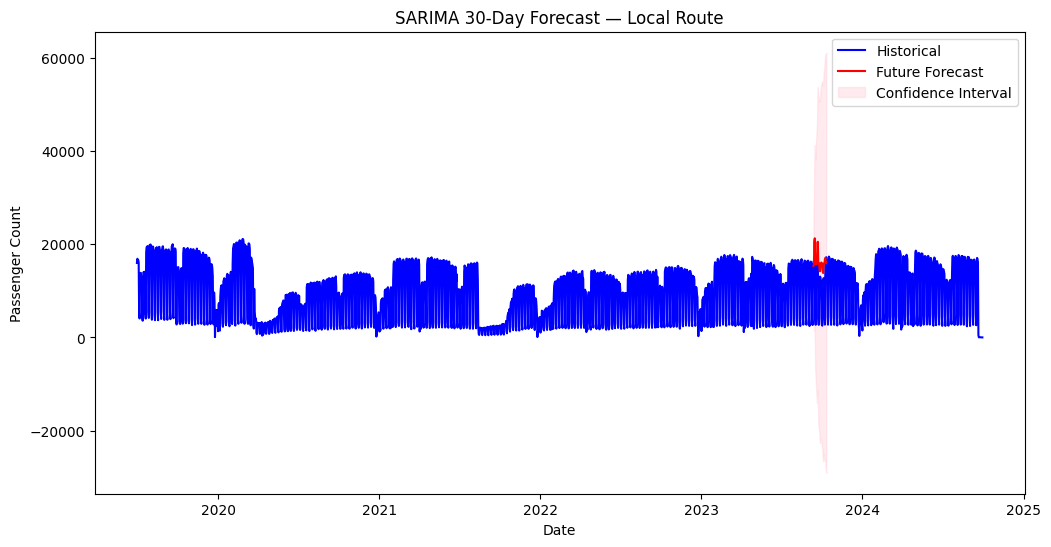

In [ ]:
# Predict the next 30 days beyond my dataset
future_forecast = results.get_forecast(steps=30)

# Extract predicted values and confidence intervals
future_values = future_forecast.predicted_mean
future_ci = future_forecast.conf_int()

# Create a DataFrame with forecasted results
forecast_df = pd.DataFrame({
    'Forecast_Date': future_values.index,
    'Predicted_Passengers': future_values.values,
    'Lower_CI': future_ci.iloc[:, 0].values,
    'Upper_CI': future_ci.iloc[:, 1].values
}).round(2)

# Display forecasted values
print("Future 30-Day SARIMA Forecast:")
print(forecast_df)

# Plot the forecast
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Local Route'], label='Historical', color='blue')
plt.plot(future_values.index, future_values, label='Future Forecast', color='red')
plt.fill_between(future_ci.index,
                 future_ci.iloc[:, 0],
                 future_ci.iloc[:, 1],
                 color='pink', alpha=0.3, label='Confidence Interval')
plt.title('SARIMA 30-Day Forecast — Local Route')
plt.xlabel('Date')
plt.ylabel('Passenger Count')
plt.legend()
plt.show()


In [ ]:
# SARIMA model for school route

SARIMA (School) — MAE: 1196.82, RMSE: 2271.87


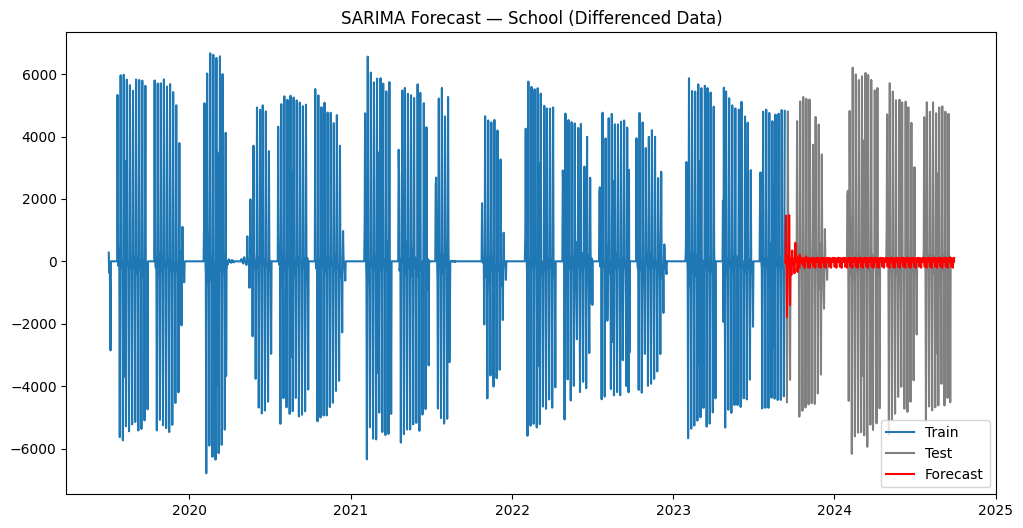

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Selected school series
school_series = df['School']

# Make\ing it stationary using differencing
school_diff = school_series.diff().dropna()

# Train-test split
train_size = int(len(school_diff) * 0.8)
train, test = school_diff[:train_size], school_diff[train_size:]

# Build SARIMA model
model = SARIMAX(train,
                order=(1,1,1),
                seasonal_order=(1,1,1,12))
results = model.fit(disp=False)

# Forecast
forecast = results.forecast(steps=len(test))

# Evaluate
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f"SARIMA (School) — MAE: {mae:.2f}, RMSE: {rmse:.2f}")

# Plot
plt.figure(figsize=(12,6))
plt.plot(train, label='Train')
plt.plot(test, label='Test', color='gray')
plt.plot(forecast, label='Forecast', color='red')
plt.title('SARIMA Forecast — School (Differenced Data)')
plt.legend()
plt.show()


In [ ]:
# From local route
#Consistent Upward Trend: Local Route ridership shows a steady increase over time, indicating growing public transport adoption and possibly urban population growth.

#Weekly and Annual Seasonality: Distinct repetitive seasonal peaks and troughs suggest that travel behavior follows a regular weekly or monthly commuting pattern, typical for work-based travel.

#from school route
#Strong Seasonality: School Route usage shows repetitive yearly cycles, with demand disappearing entirely during vacation months — a classic example of seasonality-driven service.

#flat Long-Term Trend: There’s no significant upward or downward drift in school ridership, meaning the system operates under a fixed, predictable demand base.